# Notebook to process and visualize data about faculty research experience.

Requirements:
    
    !pip install pandas
    !pip install wordcloud
    !pip install networkx
    !pip install python-louvain

Must first run scrape_bios.ipynb & parse_bios.ipynb

License: [CC BY-NC 3.0](https://creativecommons.org/licenses/by-nc/3.0/)


### Setup

In [49]:
import pandas as pd
import wordcloud
import networkx as nx
import matplotlib.pyplot as plt
import community


# set paths
bio_inpath = 'data/all_bios_parsed.json'


### Load faculty bios

To update scraped data, run scrape_bios.ipynb first.

In [36]:
# Load data
df = pd.read_json(bio_inpath)
df

faculty                     name  \
0          osgoode            Rabiat Akande   
1          osgoode  Saptarishi Bandopadhyay   
2          osgoode      Stephanie Ben-Ishai   
3          osgoode       Benjamin L. Berger   
4          osgoode       Kate Glover Berger   
..             ...                      ...   
379  uottawa-civil         David Robitaille   
380  uottawa-civil            Terry Skolnik   
381  uottawa-civil      Marie-Eve Sylvestre   
382  uottawa-civil         Sophie Thériault   
383  uottawa-civil             Joao Velloso   

                                                 title  \
0                                  Assistant Professor   
1                                  Associate Professor   
2    Professor and York University Distinguished Re...   
3    Professor & York Research Chair in Pluralism a...   
4                                  Associate Professor   
..                                                 ...   
379                               Professeur titulaire   
380                                  Professeur agrégé   
381                     Doyenne, professeure titulaire   
382   Vice doyenne aux études et professeure titulaire   
383                                  Professeur agrégé   

                              email  \
0          rakande@osgoode.yorku.ca   
1    sbandopadhyay@osgoode.yorku.ca   
2        sbenishai@osgoode.yorku.ca   
3          bberger@osgoode.yorku.ca   
4         kgberger@osgoode.yorku.ca   
..                              ...   
379     david.robitaille@uottawa.ca   
380             tskolnik@uottawa.ca   
381  Marie-Eve.Sylvestre@uottawa.ca   
382     Sophie.Theriault@uOttawa.ca   
383         joao.velloso@uottawa.ca   

                                                  href  \
0    https://www.osgoode.yorku.ca/faculty-and-staff...   
1    https://www.osgoode.yorku.ca/faculty-and-staff...   
2    https://www.osgoode.yorku.ca/faculty-and-staff...   
3    https://www.osgoode.yorku.ca/faculty-and-staff...   
4    https://www.osgoode.yorku.ca/faculty-and-staff...   
..                                                 ...   
379     https://uniweb.uottawa.ca/members/1670/profile   
380     https://uniweb.uottawa.ca/members/4305/profile   
381  https://www.uottawa.ca/faculte-droit/droit-civ...   
382  https://www.uottawa.ca/faculte-droit/droit-civ...   
383  https://www.uottawa.ca/faculte-droit/common-la...   

                                                   bio  \
0    Professor Rabiat Akande works in the fields of...   
1    I am an Associate Professor at Osgoode Hall La...   
2    Professor Stephanie Ben-Ishai is a Distinguish...   
3    Professor Benjamin L. Berger is Professor and ...   
4    Professor Kate Glover Berger joined the facult...   
..                                                 ...   
379  David Robitaille est professeur titulaire à la...   
380  Terry Skolnik is an associate professor (tenur...   
381  Marie-Eve Sylvestre est doyenne et professeure...   
382  Sophie Thériault est professeure titulaire et ...   
383  Joao Velloso enseigne le droit des peines et d...   

                                 listed_research_areas  \
0    [Legal History,  Law and Religion,  Constituti...   
1    [Law,  History,  and Politics of Disasters,  i...   
2                       [Corporate and Commercial Law]   
3    [Law and Religion,  Criminal and Constitutiona...   
4                                                 None   
..                                                 ...   
379                                               None   
380                                               None   
381                                               None   
382                                               None   
383                                               None   

                              extracted_research_areas pronouns  
0    [Comparative Law, Constitutional Law, Internat...  she/her  
1    [Environmental Law, International Law, Legal H...   

### Visualize faculty member research expertise keywords

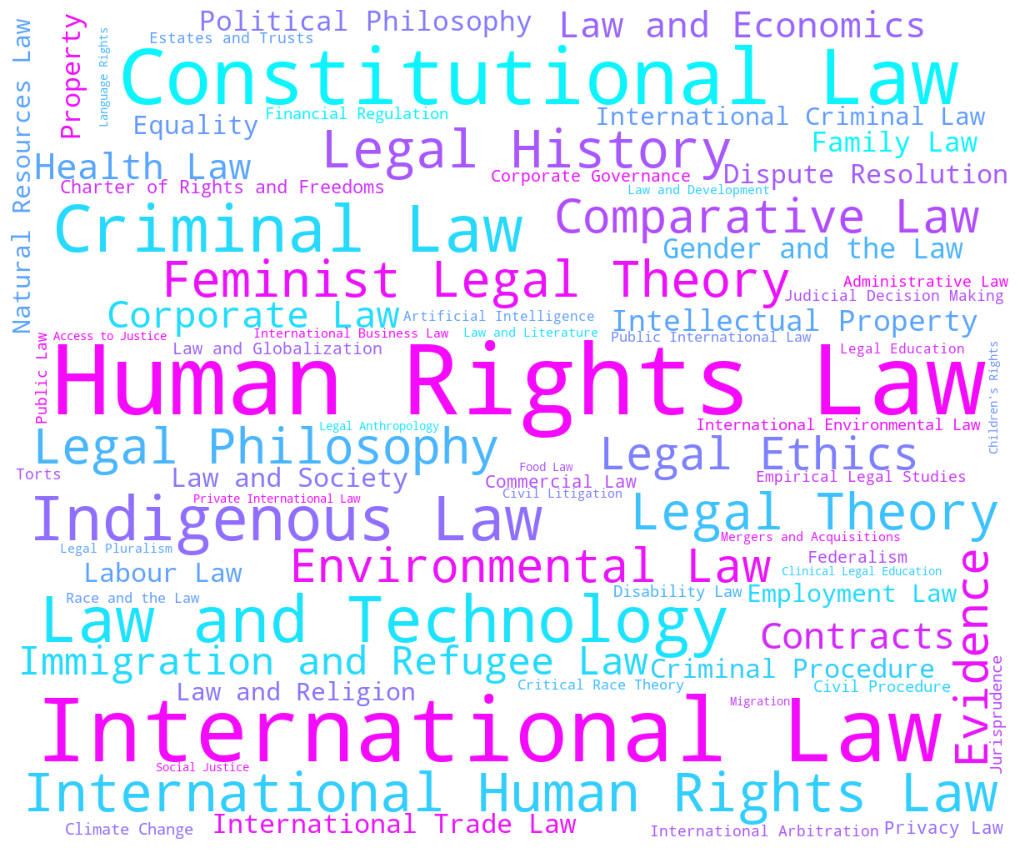

In [37]:
def create_wordcloud(df_temp, cmap_color='cool', cmap_number = 800, layout_padding = 5):
    
    df_temp['extracted_research_areas'] = df_temp['extracted_research_areas'].apply(lambda x: [] if x is None else x)

    # Join the research areas with a special character (e.g., '|')
    df_temp['joined_research_areas'] = df_temp['extracted_research_areas'].apply(lambda x: '|'.join(x))

    # Concatenate all the joined research areas
    text = ' '.join(df_temp['joined_research_areas'].values)

    # Create a WordCloud object with a white background
    colour_map = plt.cm.get_cmap(cmap_color, cmap_number)
    wordcloud = WordCloud(
        width = 1200, height = 1000,
        min_font_size = 14,
        colormap=colour_map,
        collocations=False,
        regexp=r'[^\|]+',
        background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize = (100,10), facecolor = 'white')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = layout_padding)
    plt.show()

create_wordcloud(df, cmap_color='cool', cmap_number = 750, layout_padding = 6)

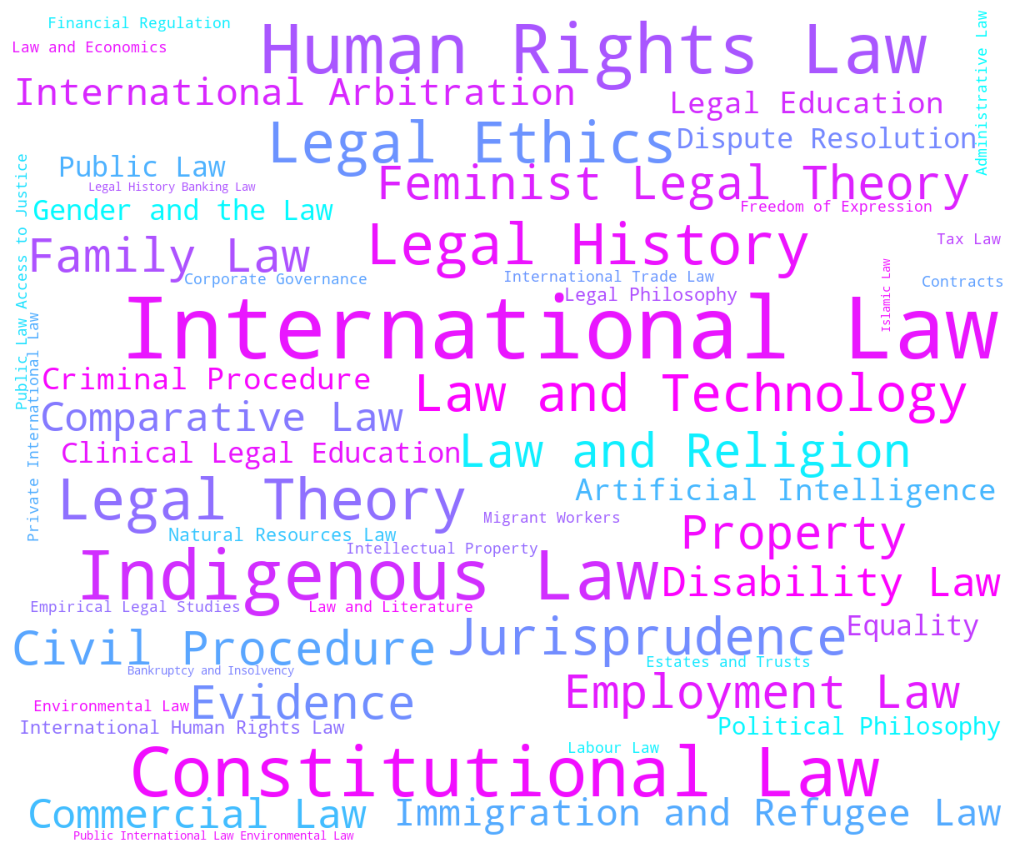

In [38]:
# get Osgoode wordcloud
df_temp = df.copy()
df_temp = df_temp[df_temp['faculty'] == 'osgoode']
df_temp = df_temp.reset_index(drop=True)
create_wordcloud(df_temp, cmap_color='cool', cmap_number = 750, layout_padding = 6)

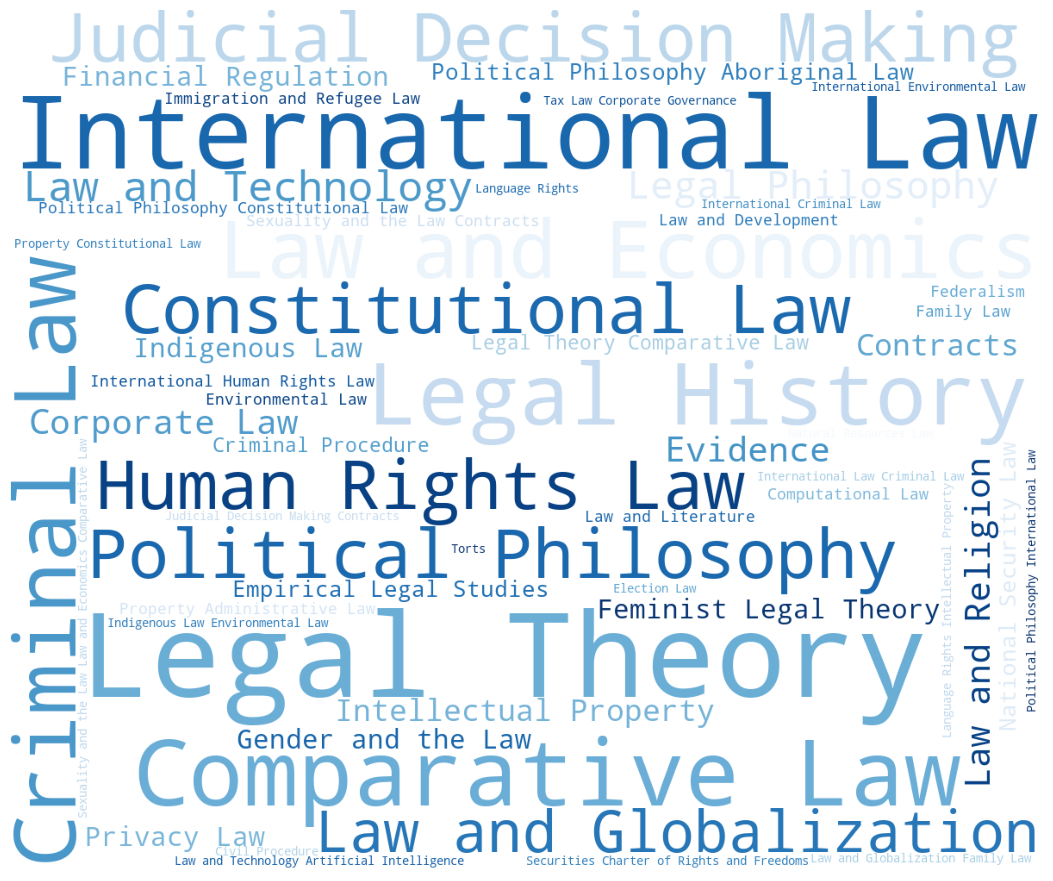

In [39]:
# get UofT wordcloud
df_temp = df.copy()
df_temp = df_temp[df_temp['faculty'] == 'u_toronto']
df_temp = df_temp.reset_index(drop=True)
create_wordcloud(df_temp, cmap_color='Blues_r', cmap_number = 625, layout_padding = 5)

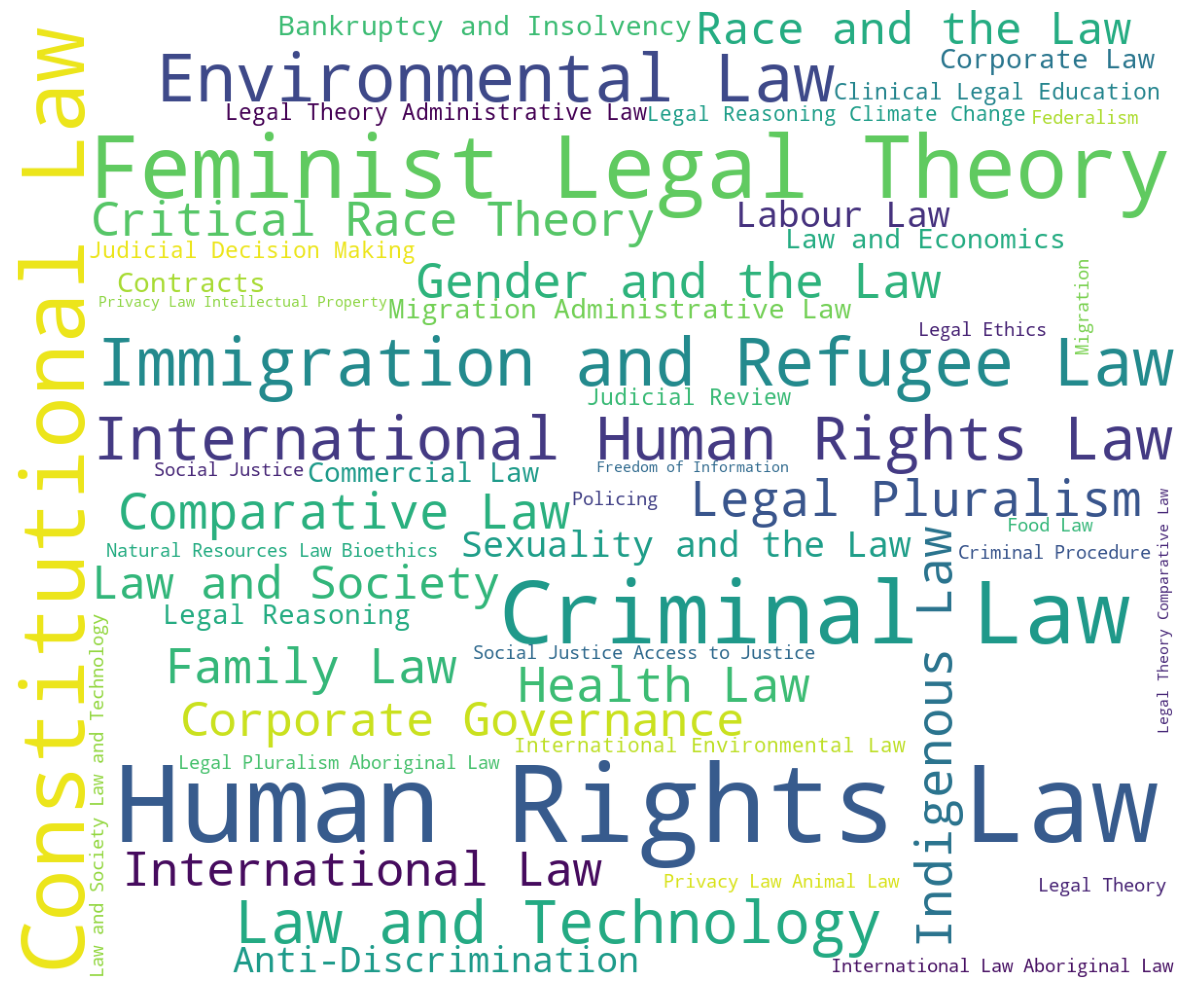

In [40]:
# get TMU wordcloud
df_temp = df.copy()
df_temp = df_temp[df_temp['faculty'] == 'tmu']
df_temp = df_temp.reset_index(drop=True)
create_wordcloud(df_temp, cmap_color='viridis', cmap_number = 100, layout_padding = 1)

### Try breaking out by gender (pronouns)

In [41]:
# make a table of percent she/her pronouns by faculty
df_temp = df.copy()
df_temp = df_temp[df_temp['pronouns'].isin(['she/her', 'he/him'])]
df_temp['she/her'] = df_temp['pronouns'].apply(lambda x: 1 if x == 'she/her' else 0)
df_temp = df_temp.groupby('faculty').agg({'she/her': 'mean'})
df_temp

she/her
faculty                 
lakehead        0.583333
osgoode         0.596774
queens          0.394737
tmu             0.476190
u_toronto       0.377049
uottawa-civil   0.400000
uottawa-common  0.521739
western         0.289474
windsor         0.607143

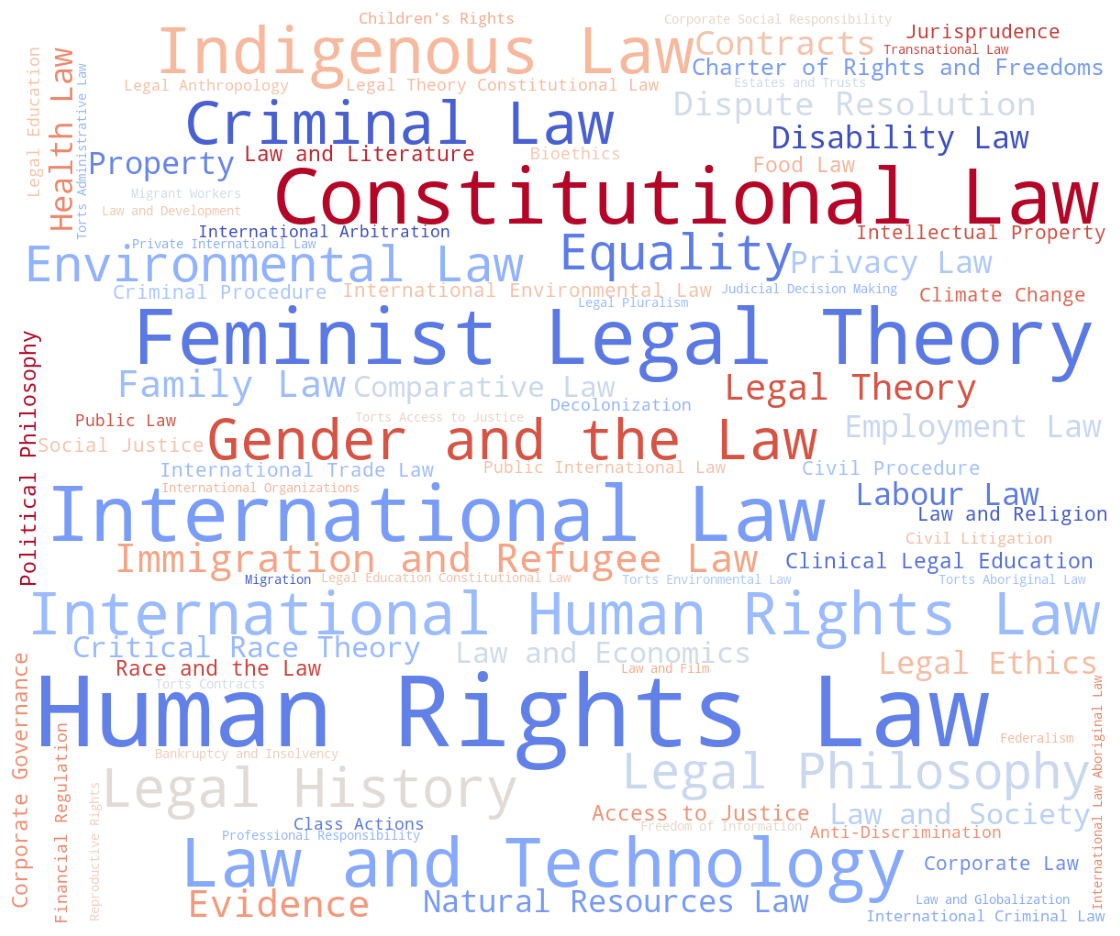

In [42]:
# get she/her wordcloud 
df_temp = df.copy()
df_temp = df[df['pronouns'] == 'she/her']
df_temp = df_temp.reset_index(drop=True)
create_wordcloud(df_temp, cmap_color='coolwarm', cmap_number = 600, layout_padding = 3)

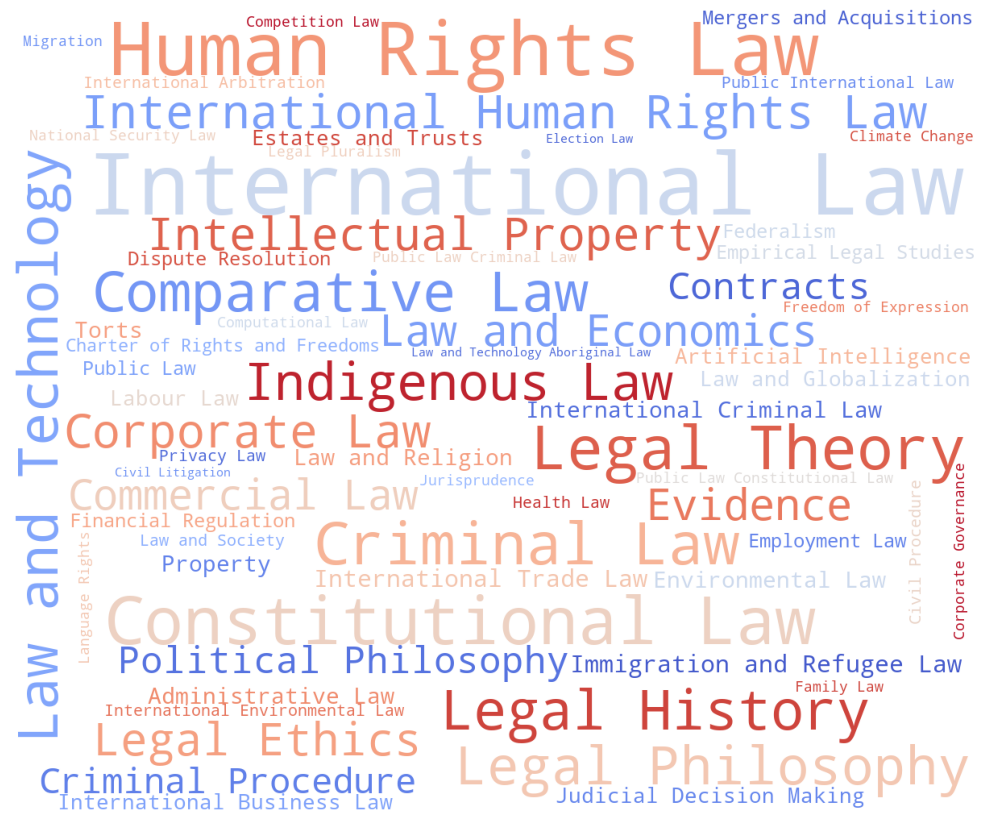

In [43]:
# get he/him wordcloud
df_temp = df.copy()
df_temp = df[df['pronouns'] == 'he/him']
df_temp = df_temp.reset_index(drop=True)
create_wordcloud(df_temp, cmap_color='coolwarm', cmap_number = 600, layout_padding = 7)

### Visualize network of research areas


In [50]:
# Load data 

df = pd.read_json(bio_inpath)

# drop rows with no extracted_research_areas
df = df.dropna(subset=['extracted_research_areas'])
df

faculty                     name  \
0          osgoode            Rabiat Akande   
1          osgoode  Saptarishi Bandopadhyay   
2          osgoode      Stephanie Ben-Ishai   
3          osgoode       Benjamin L. Berger   
4          osgoode       Kate Glover Berger   
..             ...                      ...   
379  uottawa-civil         David Robitaille   
380  uottawa-civil            Terry Skolnik   
381  uottawa-civil      Marie-Eve Sylvestre   
382  uottawa-civil         Sophie Thériault   
383  uottawa-civil             Joao Velloso   

                                                 title  \
0                                  Assistant Professor   
1                                  Associate Professor   
2    Professor and York University Distinguished Re...   
3    Professor & York Research Chair in Pluralism a...   
4                                  Associate Professor   
..                                                 ...   
379                               Professeur titulaire   
380                                  Professeur agrégé   
381                     Doyenne, professeure titulaire   
382   Vice doyenne aux études et professeure titulaire   
383                                  Professeur agrégé   

                              email  \
0          rakande@osgoode.yorku.ca   
1    sbandopadhyay@osgoode.yorku.ca   
2        sbenishai@osgoode.yorku.ca   
3          bberger@osgoode.yorku.ca   
4         kgberger@osgoode.yorku.ca   
..                              ...   
379     david.robitaille@uottawa.ca   
380             tskolnik@uottawa.ca   
381  Marie-Eve.Sylvestre@uottawa.ca   
382     Sophie.Theriault@uOttawa.ca   
383         joao.velloso@uottawa.ca   

                                                  href  \
0    https://www.osgoode.yorku.ca/faculty-and-staff...   
1    https://www.osgoode.yorku.ca/faculty-and-staff...   
2    https://www.osgoode.yorku.ca/faculty-and-staff...   
3    https://www.osgoode.yorku.ca/faculty-and-staff...   
4    https://www.osgoode.yorku.ca/faculty-and-staff...   
..                                                 ...   
379     https://uniweb.uottawa.ca/members/1670/profile   
380     https://uniweb.uottawa.ca/members/4305/profile   
381  https://www.uottawa.ca/faculte-droit/droit-civ...   
382  https://www.uottawa.ca/faculte-droit/droit-civ...   
383  https://www.uottawa.ca/faculte-droit/common-la...   

                                                   bio  \
0    Professor Rabiat Akande works in the fields of...   
1    I am an Associate Professor at Osgoode Hall La...   
2    Professor Stephanie Ben-Ishai is a Distinguish...   
3    Professor Benjamin L. Berger is Professor and ...   
4    Professor Kate Glover Berger joined the facult...   
..                                                 ...   
379  David Robitaille est professeur titulaire à la...   
380  Terry Skolnik is an associate professor (tenur...   
381  Marie-Eve Sylvestre est doyenne et professeure...   
382  Sophie Thériault est professeure titulaire et ...   
383  Joao Velloso enseigne le droit des peines et d...   

                                 listed_research_areas  \
0    [Legal History,  Law and Religion,  Constituti...   
1    [Law,  History,  and Politics of Disasters,  i...   
2                       [Corporate and Commercial Law]   
3    [Law and Religion,  Criminal and Constitutiona...   
4                                                 None   
..                                                 ...   
379                                               None   
380                                               None   
381                                               None   
382                                               None   
383                                               None   

                              extracted_research_areas pronouns  
0    [Comparative Law, Constitutional Law, Internat...  she/her  
1    [Environmental Law, International Law, Legal H...   

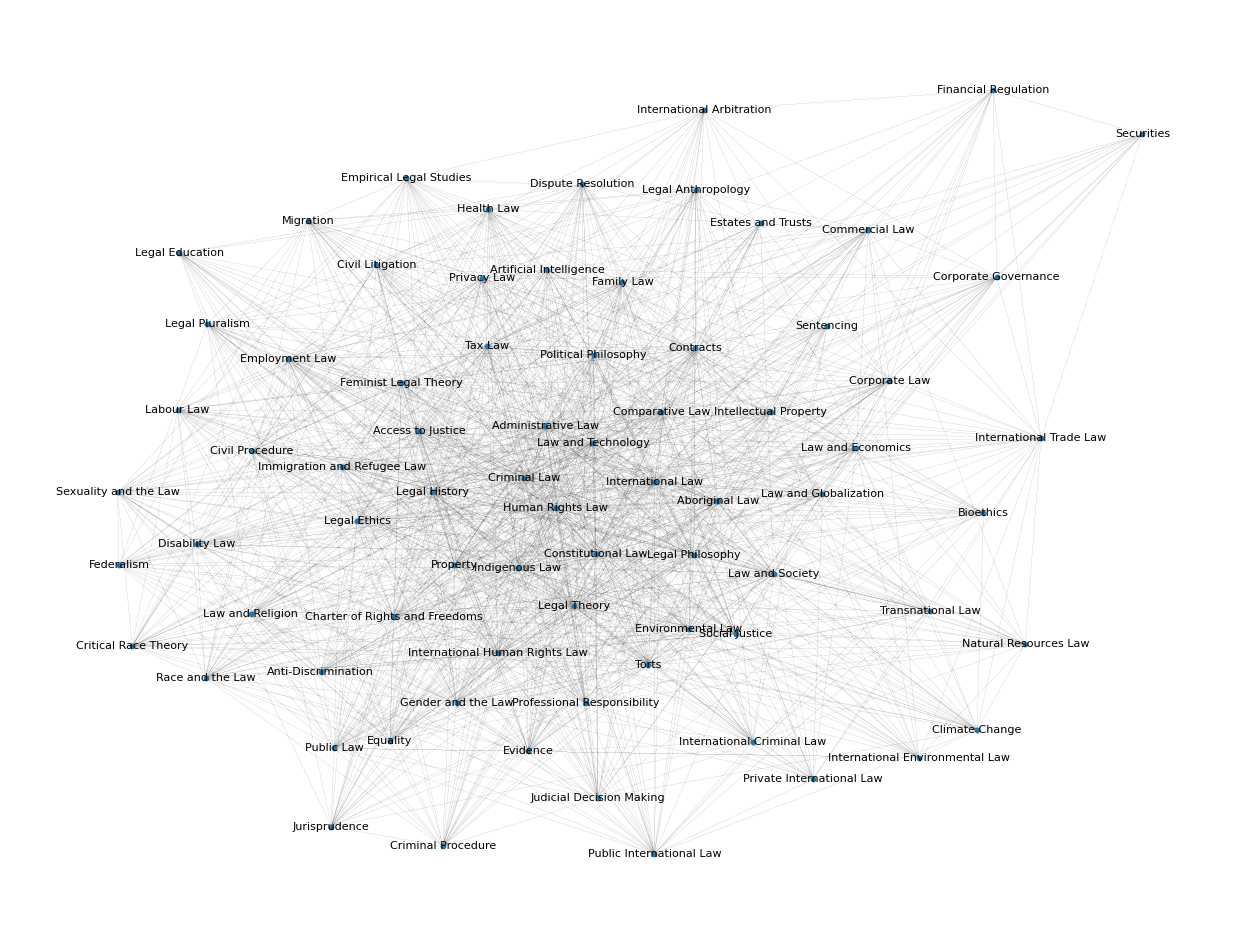

In [51]:

# count the occurrences of each research area in the column
areas_count = {}
for areas in df['extracted_research_areas']:
    for area in areas:
        areas_count[area] = areas_count.get(area, 0) + 1

# select the top 50 most common research areas
top_areas = sorted(areas_count, key=areas_count.get, reverse=True)[:75]

# create an empty graph using networkx
G = nx.Graph()

# iterate through each row in the dataframe and add edges to the graph
for idx, row in df.iterrows():
    areas = [area for area in row['extracted_research_areas'] if area in top_areas]
    for i in range(len(areas)):
        for j in range(i+1, len(areas)):
            G.add_edge(areas[i], areas[j])

# draw the graph using matplotlib
fig, ax = plt.subplots(figsize=(16, 12))
nx.draw(G, with_labels=True, font_size=8, node_size=10, width=0.05, ax=ax)
plt.show()

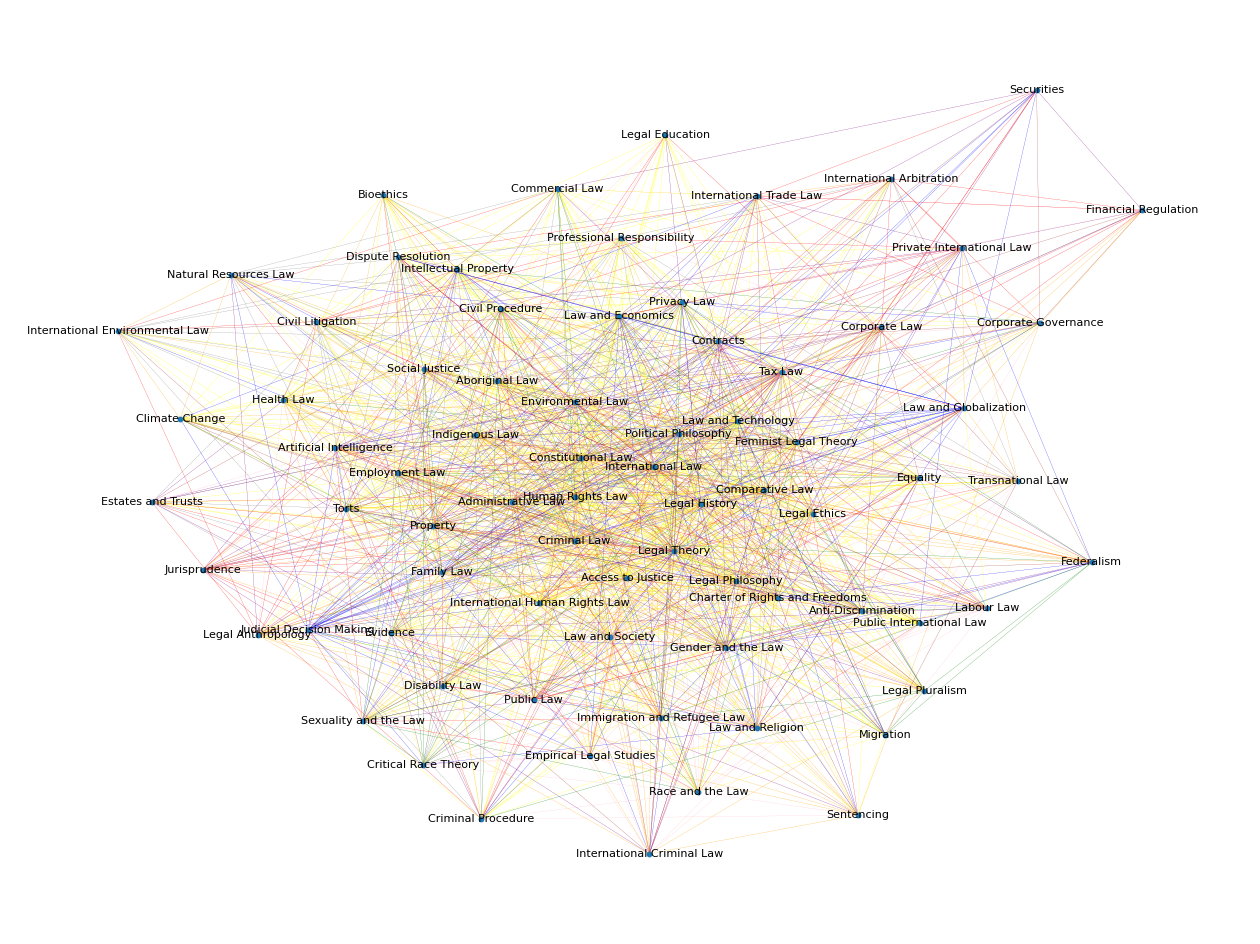

In [52]:
# define a dictionary that maps each university to a color
color_map = {'osgoode': 'red',
            'u_toronto': 'blue',
            'tmu': 'green',
            'uottawa-common': 'yellow',
            'uottawa-civil': 'orange',
            'windsor': 'pink',
            'western': 'purple',
            'queens': 'brown',
            'lakehead': 'grey'}

# count the occurrences of each research area in the column
areas_count = {}
for areas in df['extracted_research_areas']:
    for area in areas:
        areas_count[area] = areas_count.get(area, 0) + 1

# select the top 50 most common research areas
top_areas = sorted(areas_count, key=areas_count.get, reverse=True)[:75]

# create an empty graph using networkx
G = nx.Graph()

# iterate through each row in the dataframe and add edges to the graph
for idx, row in df.iterrows():
    areas = [area for area in row['extracted_research_areas'] if area in top_areas]
    for i in range(len(areas)):
        for j in range(i+1, len(areas)):
            G.add_edge(areas[i], areas[j], color=color_map[row['faculty']])

# draw the graph using matplotlib
fig, ax = plt.subplots(figsize=(16, 12))
nx.draw(G, with_labels=True, font_size=8, node_size=10, width=0.15, ax=ax, edge_color=[G[u][v]['color'] for u,v in G.edges()])
plt.show()

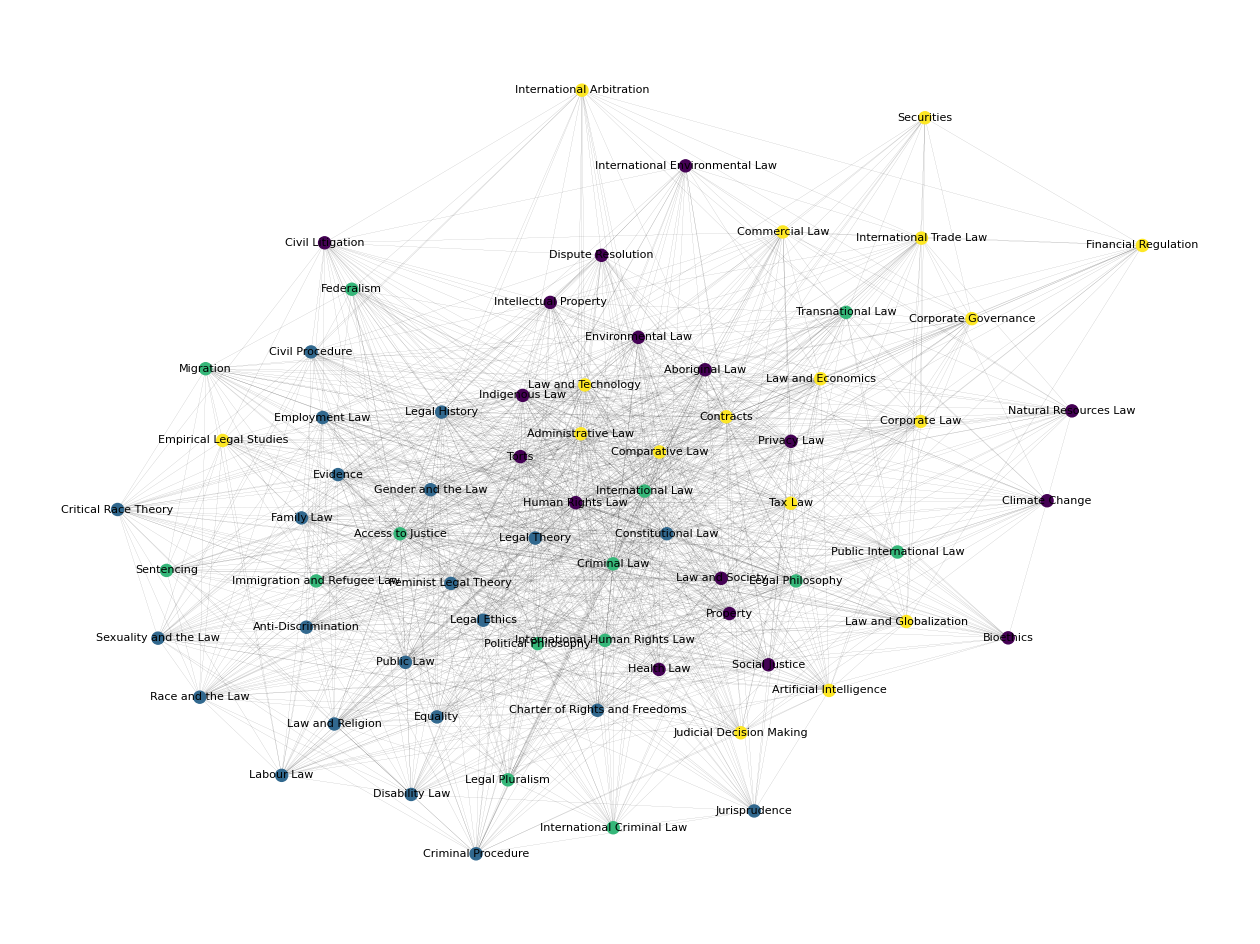

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import community

# count the occurrences of each research area in the column
areas_count = {}
for areas in df['extracted_research_areas']:
    for area in areas:
        areas_count[area] = areas_count.get(area, 0) + 1

# select the top 75 most common research areas
top_areas = sorted(areas_count, key=areas_count.get, reverse=True)[:70]

# create an empty graph using networkx
G = nx.Graph()

# iterate through each row in the dataframe and add edges to the graph
for idx, row in df.iterrows():
    areas = [area for area in row['extracted_research_areas'] if area in top_areas]
    for i in range(len(areas)):
        for j in range(i+1, len(areas)):
            G.add_edge(areas[i], areas[j])

# find communities in the graph using the Louvain algorithm
communities = community.best_partition(G)

# draw the graph using matplotlib, with nodes colored by community
fig, ax = plt.subplots(figsize=(16, 12))
nx.draw(G, with_labels=True, font_size=8, node_size=75, width=0.05, ax=ax,  node_color=[communities[node] for node in G.nodes()])
plt.show()